$~~~~~~~~~~~$<img src="https://moodlesupd.script.univ-paris-diderot.fr/pluginfile.php/1/theme_foundation/frontpageslideimage1/1585262946/moodle_logo.png" width="350" />
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$
<img src="http://www.apc.univ-paris7.fr/APC_CS/sites/default/files/logo-apc.png" />

<br>

***

<center>
<h1>
Etude des catalogues COSMOS et True Universe à l'aide des Self Organizing Maps
</h1> 
</center>

***

<br>

<center>

Stage de Master Physique 1 - 2020

Etudiant : Olivier ROTH

Encadrants : Alexandre BOUCAUD, Hubert BRETONNIERE

Rapporteur : Yann RASERA

Stage effectué au sein du laboratoire Astroparticules & Cosmologie sur une durée de 2 mois.

</center>

<br>



## Introduction

Ce stage s'inscrit dans la mission Euclid, un téléscope spatial dont le lancement est prévu pour 2022, "destinée à percer les mystères de l’énergie noire et de la matière noire" d'après l'ESA.

Pour y parvenir, le satellite étudiera des galaxies qui se trouvent à différentes distances de la Terre et tirera avantage de l'effet de lentille gravitationnelle faible, qui mesure la distorsion des galaxies lointaines causée par de la matière qui s’interpose entre l'objet observé et l'observateur, ainsi que des oscillations acoustiques des baryons, obtenues en mesurant l’agglomération des galaxies, pour obtenir une image en 3D de l’évolution de la distribution de la matière noire et de la matière ordinaire (baryonique) dans le cosmos.

\\

<font color='red'> Reformuler et developper. Pour Euclid, on veut une pipeline de traitement de donnees complete (depuis les donnees brutes jusqu au resultats physiques). Puisque cette pipeline est developpee avant le lancement, on a pas d image reeles. On veut donc des simulations les plus proches de ce que verra euclid pour se rapprocher le plus possible du fonctionnement futur de la pipeline. Pour ca, il faut un catalogue (tu peux commencer a dire que par exemple, si on simulait uniquement les galaxies d hubble, on aurait les biais observationnels de hubble et donc ca serait pas representatif d euclid). Tu peux expliquer un peu commment a ete cree ce catalogue (je peux t envoyer des refs). Ca c est pour TU
    
Ensuite il faut expliquer pourquoi tu compare a Cosmos. Tu dis que les simulations dans la pipeline euclid ne sont pas tres complexes niveau morphologie et que donc ce n est pas ideal pour certains problemes. Une equipe (tu peux citer peut etre notre papier en preparation avec francois, a voir), est en train de developper un algorithme d aprentissage automatique generatif pour simuler des galaxies a la ;orphologie plus cpmplexe. Or, pour l instant, ce algo est entraine sur Cosmos. Le machine learning ayant des difficultes bien connues a donner de bons resultats au dela des donnes d entrainement, on veut trouver un moyen de comparer l entrainement (cosmos) aux galaxies qu on veut simuler pour la pipeline euclid (TU)</font>

Afin d'identifier certains types de galaxies, nous avons besoin d'entrainer des algorithmes à l'avance avec des données. Et pour savoir si ces données sont bien et pleinement représentatives de la réalité, nous allons confronter un catalogue issu d'une simulation avec un catalogue provenant de données réelles au moyen d'un outil de machine learning faisant appel à l'apprentissage non-supervisé les Self Organizing Maps (SOMs). <font color='red'> Etre plus clair sur la difference entre les catalogues et les images. Dans cette etude on ne doute pas du fait que TU est representatif de la realite. Mais on veut avoir un indice des differnece entre TU et Cosmos pour pouvoir dire que les galaxies simulees par le VAE non presente dans cosmos seront moins bonne (dans le sens bug de simulation plus que 'non reelle')</font>


Ces réseaux détectent des patterns dans des données multidimensionnelles et les représentent dans des espaces à dimensions beaucoup plus faibles, généralement en deux dimensions. 

La faible dimension de la carte résultante permet une présentation graphique des données qui peut être facilement interprétée par l'homme.





## Sommaire


 ##  [Théorie sur les SOMs](#S3)
 
 ## [Première approche : classification des couleurs](#S3_1)
> ### [Heatmap](#S3_2)
> ### [Erreurs](#S3_3)


 ##   [Application des SOMs aux catalogues COSMOS et True Universe](#S4)
> ### [Variables](#S4_2)
> ### [Dépeuplement des fortes magnitudes](#S4_4)

<a name="S3"></a>

<ins>
<h1> 
Théorie sur les SOMs
</h1>
</ins>


<font color='red'>A voir avec Alex, mais je pense qu il faudrait que tu etoffe un peu en introduisant en quelque mot les principes generaux de machine learning (echantillon d entrainement, loss, reseau de neurone. Parce que la tu parles de plein de concepts des la preniere ligne qui seront peut etre (surement) assez abstraite et mysterieuse pour les lecteurs. C est bien de dire que le SOM est different des autre reseaux, mais si tu ne sais pas ce qu est un reseau plus classique ca apporte pas grand chose de le dire. Il faut aussi que tu developpes bcp plus l idee du som, avant d expliauer l algorithme (qui est bien ecrite, meme s il faut developper un peu aussi je pense).</font>


Le machine learning est un domaine d'étude de l'intelligence artificielle qui utilise des approches mathématiques et statistiques pour donner aux ordinateurs la capacité d'«apprendre» à partir de données, c'est-à-dire d'améliorer leurs performances dans la résolution de tâches sans être explicitement programmés pour chacune d'entre elles. 

La plupart des outils de machine learning, et notamment les SOMs, utilisent des réseaux de neurones pour cet apprentissage. Les neurones sont simplement des vecteurs, comportant un nombre de paramètre égal au nombre de variables que l'on veut regarder, faisant des SOMS des tenseurs.



Les SOMs diffèrent des autres réseaux neuronaux artificiels car elles appliquent l'apprentissage compétitif par opposition à l'apprentissage par correction d'erreurs (comme la backpropagation avec descente de gradient par exemple), et dans le sens où elles utilisent une fonction de voisinage pour préserver les propriétés topologiques de l'espace d'entrée.


Les cartes obtenus sont constituées de neurones, disposés selon la topologie choisie (par exemple rectangulaire ou hexagonale). Chaque neurone est associé à un vecteur “poids" ayant la même dimension que chaque vecteur d'entrée. 


Alors que les neurones de l'espace cartographique restent fixes, l'entraînement consiste à déplacer des vecteurs de poids vers les données d'entrée (réduisant une métrique de distance) sans altérer la topologie induite de l'espace cartographique.  Ainsi, le SOM décrit une mise en correspondance d'un espace d'entrée de dimension supérieure à un espace cartographique de dimension inférieure. Une fois formée, la carte peut classer un vecteur de l'espace d'entrée en trouvant le neurone avec le vecteur de poids le plus proche du vecteur de l'espace d'entrée.<font color='red'> Cette explication est bien, je la mettrai peut etre en introduction du paragraphe qu en conclusion, pour expliquer a quoi servent les soms avant d expliquer leur fontionnement</font>


Les poids des neurones sont initialisés soit à de petites valeurs aléatoires, soit échantillonnés de manière égale depuis le jeu de données de l'entrée. Avec cette dernière alternative, l'apprentissage est beaucoup plus rapide car les poids initiaux donnent déjà une bonne approximation des poids du SOM.


Concrètement, par étapes :

 1. On initialise les poids soit aléatoirement, soit depuis un échantillonnage de jeu de données

 2. On choisit un vecteur d'entrée au hasard parmis l'échantillon d'entrainement

 3. On traverse parcourt chaque neurone de la carte 

 a. On calcule la distance euclidienne pour trouver les similarités entre le vecteur d'entrée et le vecteur de poids du neurone de la carte

 b. On repère le neurone qui a la plus petite distance (ce neurone est appelé le Best Matching Unit, BMU)

 4. On met à jour les vecteurs de poids des neurones situés dans le voisinage du BMU (y compris le BMU elle-même) en les rapprochant du vecteur d'entrée grâce à la formule suivante : 
  $$W_v (i+1) = W_v(i)+f(i,u) \times (D(z)-W_v(i))$$ 
 Avec $W_v$ le vecteur de poids du neurone $v$, \
 $f=\lambda \times exp{\left(-\frac{x^2}{2\pi \sigma_i^2} - \frac{y^2}{2\pi \sigma_i^2}\right)}$ 
 la fonction qui détermine la zone modifiée selon $\sigma$, à l'itération actelle i, \
 $\lambda$ le learning rate, $u=(x,y)$ la position du BMU,
 $D$ un vecteur de données d'entrée d'indice $z$. 


 5. On répète depuis l'étape 2 jusqu'à un nombre d'itération défini à l'avance

À noter que le $\sigma$ et le $\lambda$ diminuent au cours de l'entrainement pour affiner l'apprentissage.

À l'issue le cet entrainement, il s'agit d'interpréter la carte obtenue. Plusieurs points seront à étudier : est-ce que des clusters se sont formés, est-ce que tous l'espace d'entrée est bien représenté, y a-t-il des corrélations entre les différentes couches de la carte, la carte est-elle lisse (est-ce que les frontières entre les clusters sont fortes ou est-ce que les transitions se font facilement), et autres...

\
Parmi les grandes questions autour des SOMs, les plus importantes, compliquées à la fois (et toujours à l'étude dans le monde de la recherche) sont : 
- quelle est la taille adéquate de la carte pour bien représenter les données ?
- quel $\sigma$ et $\lambda$ initiaux doit-on prendre ?
- le réseau a-t-il convergé au terme de l'apprentissage ? 


\
Comme les réseaux neuronaux ne font pas de distinction dans la façon dont ils forment des associations, ils peuvent former des associations inattendues et révéler des relations et des dépendances qui n'étaient pas connues auparavant.

<a name="S3_1"></a>

<ins>
<h1> 
Première approche : classification des couleurs
</h1>
</ins>



Le principe Self Organizing Maps étant assez simple, mais reposant une technique complexe dont les analyses et théories sont encore assez débattues dans le monde scientifique, nous commencerons pas les étudier sur un terrain familier : la classification de couleurs. 
En effet, plutôt que de se plonger directement dans l'analyse de catalogues de données astrophysiques, les couleurs permettent d'appréhender le concept des SOMs avec un résultat déjà connu à l'avance et une interprétation des résultats sans effort ni ambiguïté.


Dans le machine learning, un des aspects important pour obtenir de bon résultats est l'uniformisation des jeux de données d'entrainement.
Nous avons donc créé pour cet exemple un jeu de données uniformes de 40 000 couleurs. \
Le $\sigma$ est initialisé à 25 car, comme nous le verrons plus tard, c'est un bon compromis pour obtenir un résultat satisfaisant.
Le $\lambda$ est quant à lui initialisé à 1 et nous entrainons sur 1000 itérations pour une carte en 2 dimensions de taille 100 par 100.

Nous nous attendons à ce que les couleurs soient classées à la fin de l'entrainement puisque le SOM va essayer de minimiser les distances euclidiennes entre chaque vecteurs (=couleur) en trouvant à chaque fois le BMU. Si les paramètres initiaux sont en adéquation avec la taille de la carte alors les couleurs seront séparées de façon assez lisse.


<a name="fig1"></a>



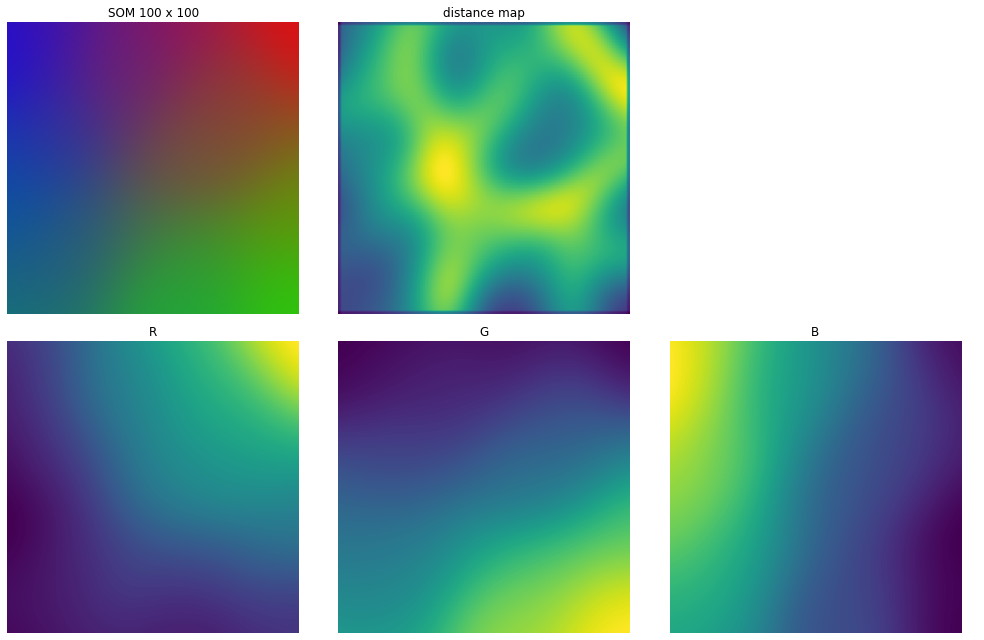

In [ ]:
sigma = 25
learning_rate = 1
som, weights = train_som(data_color, sigma, learning_rate, 1000, size=(100,100))

PlotSOMs(som)

<center>

Figure 1 : En haut à gauche SOM topologie rectangulaire, en haut au milieu  distance map, en bas les poids de chaque couleur.
</center>

À l'issue de l'entrainement les couleurs sont classées comme on peut le voir sur le graphique en haut à gauche de la figure [1](#fig1).

Les poids de chaque couleur, les trois graphiques en bas, sont bien dissociés et chaque couleur est formée d'un seul cluster.

La "distance map" aussi appelée "U-matrix" nous permet de voir les limites entre les couleurs. Si deux couleurs proches dans le spectre se trouvent à côté alors leur distance sera faible et le pixel représentant cette distance sur la distance map sera foncé.
Elle est la traduction de la distance euclidienne entre chaque pixels, c'est pourquoi cette distance est plus faible sur les bords (et encore plus sur les coins) qui possèdent moins de pixels voisins.

On peut également faire un entrainement avec une topologie hexagonale. le résultat est censé être meilleur puisque chaque neurone possède 6 voisins directs au lieu de 4 dans une topologie rectangulaire, donnant une flexibilitée plus grande.

<a name="fig2"></a>

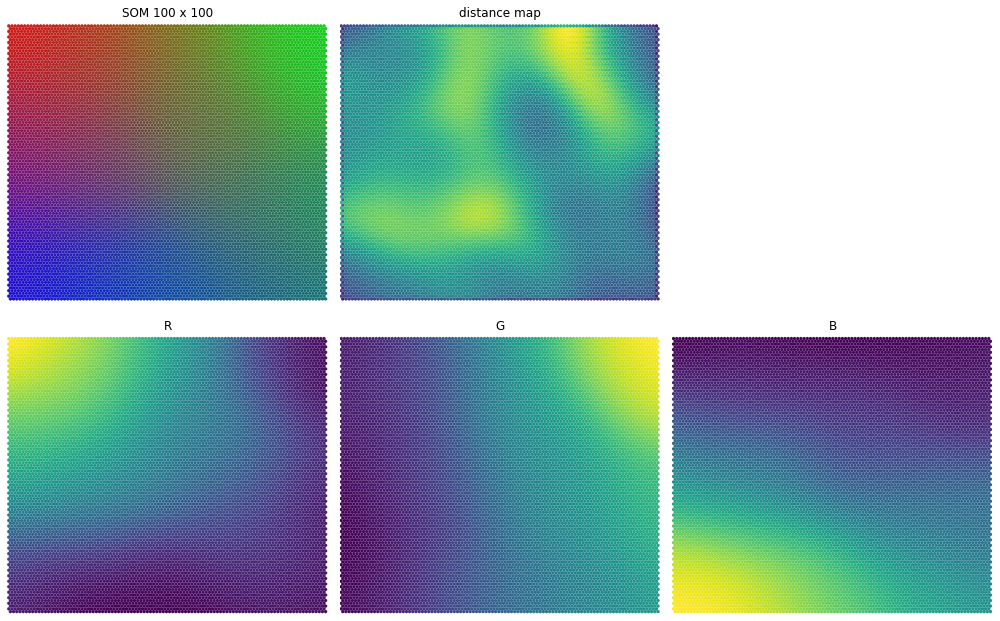

In [ ]:
sigma = 25
learning_rate = 1
topo='hexagonal'

som, weights = train_som(data_color, sigma, learning_rate, 1000, size=(100,100), topology=topo)

PlotSOMs(som, topology=topo)

<center>

Figure 2 : En haut à gauche SOM topologie hexagonale, en haut au milieu  distance map, en bas les poids de chaque couleur.
</center>

Les couleurs étant assez facile à classer, que ce soit en topologie rectangulaire ou hexagonale, le résultat est assez bon. Chaque couleur ne forme qu'un seul cluster, toujours éloigné au maximum des autres et les liaisons entre couleurs sont lisses.

<a name="S3_2"></a>

<ins>
<h2> 
Heatmap
</h2>
</ins>


Une fois le réseau entrainé, on peut l'utiliser pour classer un nouveau jeu de données.

<font color='red'> ajouter définition de la heatmap ( / hitmap ? )</font>


On regarde où tombe un jeu de données de 10 000 couleurs majoritairement bleues sur la carte en figure [1](#fig1) :

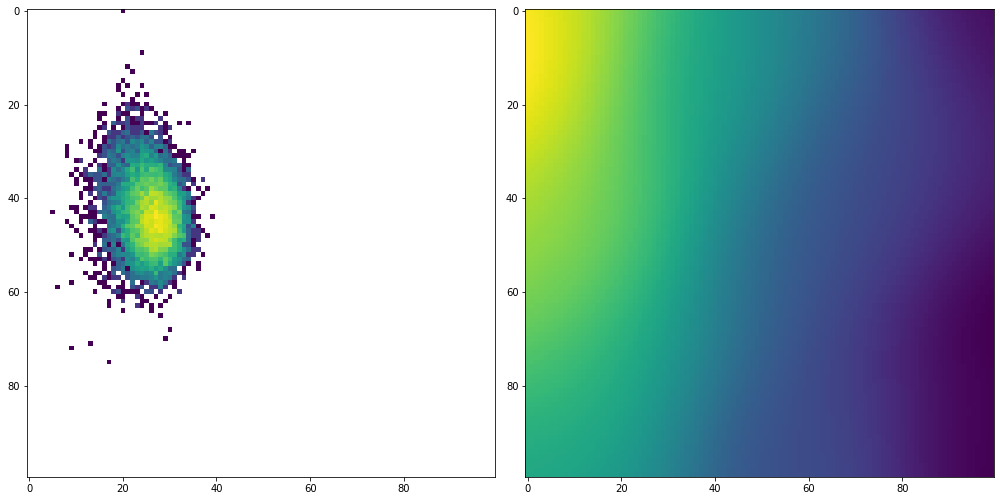

In [ ]:
Heatmap(som, data_blue, compare=w_rescale, hit_count=False)# gauss, norm : .3/.05, .3/.05, .7/.05

<center>

Figure 3 : Heatmap (gauche), activation de la carte rectangulaire en réponse à un jeu de données bleu. À droite on a remis les poids associés à la couleur bleue.
</center>

On voit que le jeu de données majoritairement bleu tombe bien la où le bleu est réparti sur la carte.\
Puisqu'on a pris un bleu léger, un peu de rouge et de vert, les points de la heatmap ne sont pas à l'extrémité du bleu du SOM.



De la même manière, en topologie hexagonale, avec la carte de la figure [2](#fig2):


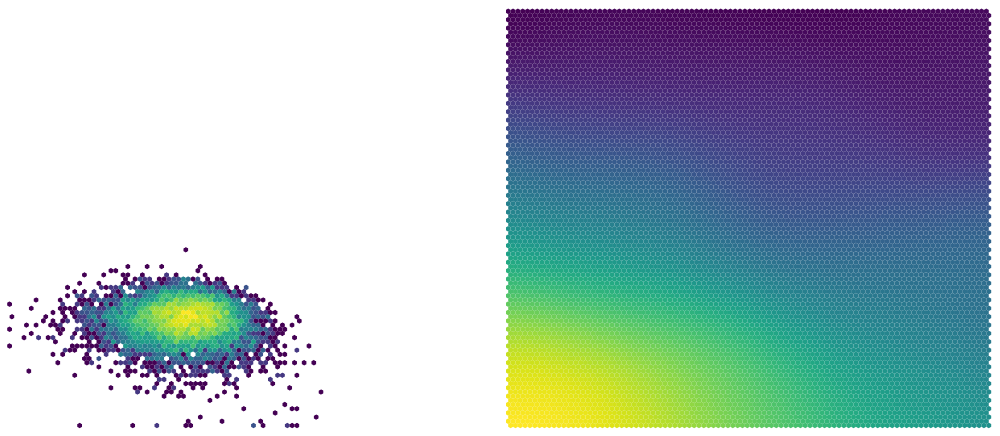

In [ ]:
Heatmap(som, data_blue, compare=w_rescale, hit_count=False, topology=topo) # gauss, norm : .3/.07, .3/.07, .8/.07

<center>

Figure 3 : Heatmap (gauche), activation de la carte hexagonale en réponse à un jeu de données bleu. À droite on a remit les poids associés à la couleur bleue.
</center>

Là aussi la zone activée par le jeu de données bleu correspond bien à l'emplacement du bleu sur la figure [2](#fig2).

<a name="S3_3"></a>

<ins>
<h2> 
Erreurs
</h2>
</ins>

 Afin de s'assurer que ces modèles sont effectivement représentatifs des données sous-jacentes, il est essentiel d'évaluer la qualité des cartes obtenues.

 Pour cela, on regarde l'évolution de certains paramètres : la "quantization error", la "topological error", la valeur moyenne de la distance map. <font color='red'>Rajoute les formules et une explication de ces erreurs, tu ne peux pas ploter une fonction que tu n as pas explicite</font>
 

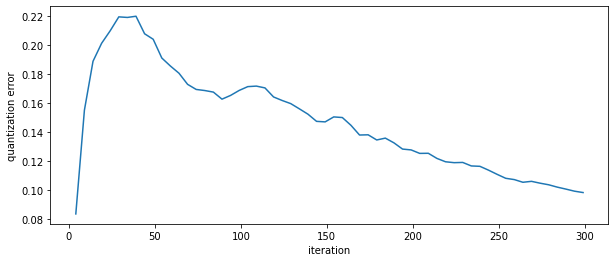

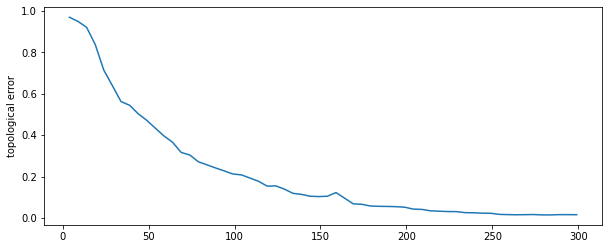

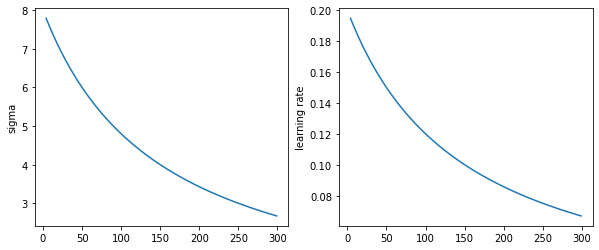

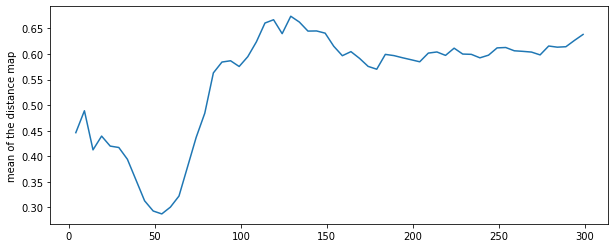

In [ ]:
plot_error(dict_vars)

<center>

Figure 5 : De haut en bas, la quantization error, la topological error, sigma et learning rate, la moyenne de la distance map.
</center>

Au cours de l'entrainement, on peut voir que la "quantization error" (calculée comme étant la distance moyenne entre chaque échantillon d'entrée et l'unité qui lui correspond le mieux) diminue. 

\
L'erreur topographique (traduisant l'éloignement des clusters de couleurs identiques) diminue elle aussi. 
Pour tous les échantillons de données, on détermine les meilleures et les deuxièmes meilleures unités correspondantes. Si ces unités ne sont pas adjacentes sur la carte, on considère cela comme une erreur topographique. <font color='red'>L explication est bonne, manque la formule. </font>

Une carte avec une forte erreur topographique ne permettra pas la formation d'un seul cluster pour chaque paramètre (qui est un critère de réussite de l'entrainement) et sera donc à éviter.

\
Ensuite, on peut voir le sigma et le learning rate diminuer au fil des itérations pour augmenter la précision de la cartographie.

\
Enfin, on peut voir l'évolution de la moyenne de la distance map. Elle se stabilise au bout de quelques itérations du fait de la réduction du sigma : les changements sont si petits que la distance map n'évolue plus beaucoup. <font color='red'>Faudrait qu on discute de ca. Cette carte est pas hyper evidente a analyser, faut qu on soit sur de ce au on dit si on la mets dans le rapport</font>



<a name="S3_3"></a>

<ins>
<h2> 
Influence du sigma
</h2>
</ins>


Comme nous l'avons vu précédemment, le sigma initial $\sigma_0$ est un paramètre qui détermine la zone de modification des poids. Il est donc important de bien le définir pour que l'entrainement n'agisse pas sur des zones ni trop grandes ni trop petites.

<a name="fig6"></a>

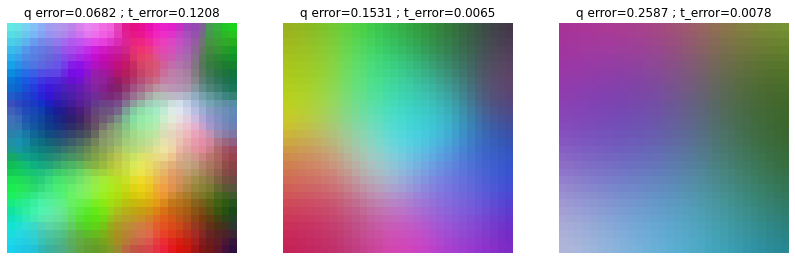

In [ ]:
multi_sigma_plot([0,17,-1], weights_multi, q_error, t_error)

<center>

Figure 6 : SOM de taille 30x30 entrainé avec $\sigma=1.5$ à gauche, $\sigma=7$ au milieu et $\sigma=14$ à droite.
</center>

<a name="fig7"></a>

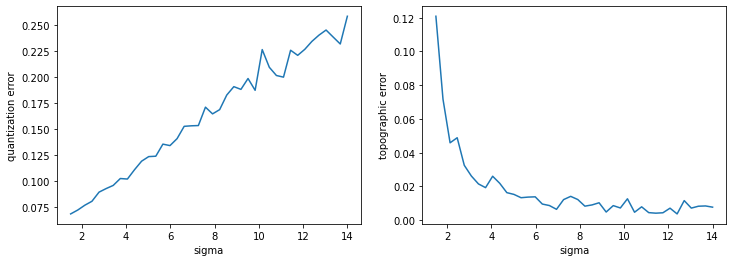

In [ ]:
weights_multi, q_error, t_error, sigma_multi  = multi_sigma(40, dat_color())

<center>

Figure 7 : Quantization et topographic error pour différents sigma entre 2 et 14 pour une carte de taille 30.
</center>

Les figures [6](#fig6) nous permettent de mieux appréhender ce concept de sigma. A gauche, avec un $\sigma_0$ trop petit, les zones modifiées sont trop petites dès le début de l'entrainement et les clusters de même couleurs se forment donc à des endroits différents de la carte. 
A droite à l'inverse, avec un $\sigma_0$ trop grand, la carte est trop homogénéisée et on ne distingue plus les couleurs entre elles.
Au milieu, avec un $\sigma_0$ raisonnable, les couleurs sont plutôt regroupées et les frontières entre elles sont assez lisses.

Ensuite en figure [7](#fig7), nous pouvons voir les erreurs de quanfication et topograpique en fonction du $\sigma_0$ pour de nombreux entrainements.
\
L'erreur topographique qui traduit le regroupement des mêmes couleurs en un seul cluster diminue avec le $\sigma_0$. Cela se voit bien grâce à la figure [6](#fig6), puisqu'à très petit sigma les couleurs ne sont pas regroupées et l'erreur est donc forte, alors qu'à très grand sigma les couleurs ne forment qu'un seul cluster et l'erreur est faible.
\
La quantization error quant à elle, évolue de façon inverse : elle augmente avec le $\sigma_0$. En effet, cette erreur transcrit la présence des couleurs : si toutes les couleurs sont représentées alors l'erreur sera faible comme pour le graphique de gauche de la figure [6](#fig6) et inversement.


Il s'agit donc, pour chaque carte, de lui attribuer un sigma correspondant à sa taille pour obtenir des résultats satisfaisant.

<font color='red'>parler relation sigma/taille du som.</font>

<a name="S4"></a>

<ins>
<h1> 
Application des SOMs aux catalogues COSMOS et True Universe
</h1>
</ins>


parler des catalogues COSMOS et True Universe

\
[COSMOS](http://cosmos.astro.caltech.edu/page/hst) : d'où il vient (Hubble Space Telescope), ce qu'il contient...

[download](https://galsim-developers.github.io/GalSim/_build/html/real_gal.html) COSMOS




\
TU : comment il est obtenu, ce qu'il contient

<figure>
<center>
<img src="https://i.ibb.co/HqXsLyB/GxCOSMOS.png" alt="GxCOSMOS" border="0">
</center>
</figure>


<center>

Figure 8 : Galaxies du catalogue COSMOS, indice de Sersic en abscisse de gauche à droite entre 0 et 6 et ellipticité en ordonnée de bas en haut entre 0 et 1. 
</center>

<font color='red'>Ajouter une formule pour toutes les defs</font>

La magnitude est une mesure d'intensité lumineuse, plus la magnitude est élevée et plus l'intensité sera faible (échelle log inverse).

L'indice de Sersic décrit comment le profil lumineux d'une galaxie varie en fonction du rayon. Plus le sersic est grand et plus la lumière est concentrée au centre de la galaxie ???

Le rayon effectif ou rayon de demi-lumière (half light radius) d'une galaxie est le rayon où la moitié de la lumière totale est émise. <font color='red'>le rayon $r_e$ tel que la moitie de la luminosite de la galaxie soit contenu dans le cercle de rayon $r_e$  </font>

q correspond à $1-e$, avec $e$ l'ellipticité

<a name="S4_2"></a>

<ins>
<h2> 
Variables
</h2>
</ins>



Nous avons représenté ci-dessous les variables utilisées, présentes dans les deux catalogues : 

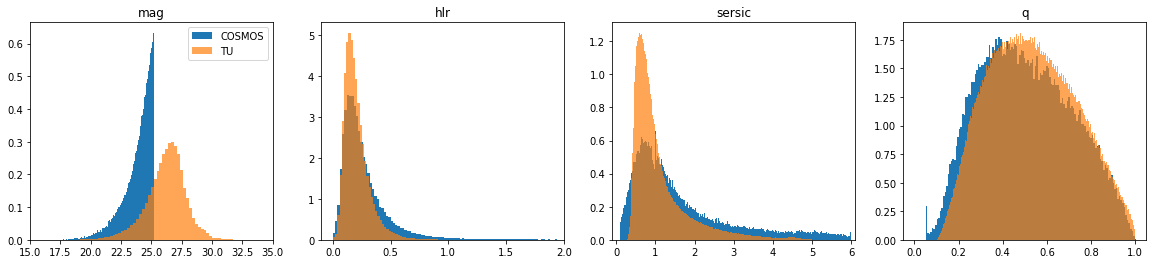

In [ ]:
compare_CS_TU(data_cs_ex, TU_fuse, norm=False)

<center>

Figure 9 : Comparaison des magnitudes, rayons effectifs, sersic et q pour entre les deux catalogues.
</center>

Nous observons que le catalogue COSMOS, tiré d'observations réelles, possède une magnitude limite à $25,2$ . Cette forte différence entre les catalogues sera étudiée plus en détail dans les sections suivantes.

Pour ce qui est des autres variables, les catalogues concordent.

<a name="S4_4"></a>

<ins>
<h2> 
Dépeuplement des fortes magnitudes
</h2>
</ins>



Nous venons de voir que le catalogue COSMOS possédait une magnitude limite de $25,2$. On espère retrouver ici ce manque de galaxies à forte magnitude à travers un dépeuplement de certaines zones de la heatmap.

Nous entrainerons d'abord le réseau avec seulement 2 variables, pour obtenir une classification bien plus simple et plus lisible. Nous verrons après ce que cela donnera pour les 4 paramètres en même temps.

<ins>
<h3> 
Visualisation du "problème"
</h3>
</ins>


Nous entrainons donc le réseau avec le catalogue True Universe, censé représenter tous les cas de figure présents dans l'univers, en ne prenant que la magnitude et le rayon effectif.

<a name="fig10"></a>

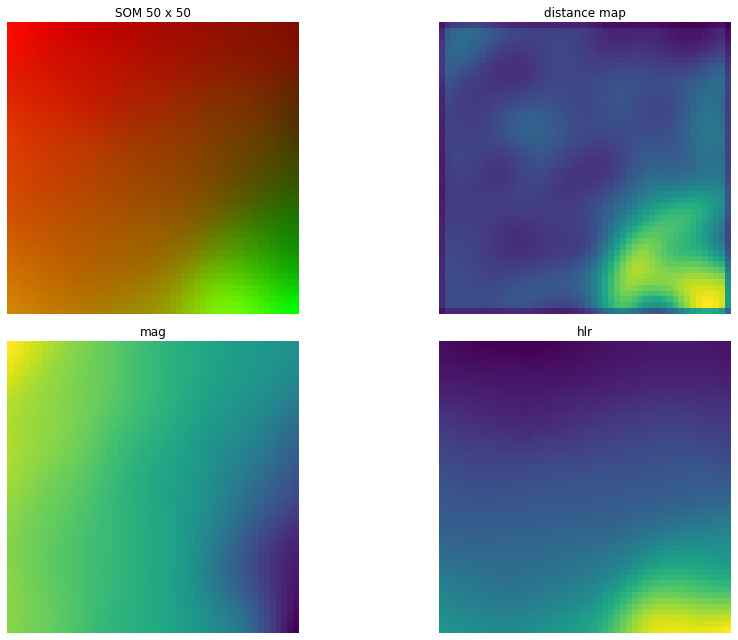

In [ ]:
PlotSOMs(som_tu, vars_tu, topology=topo, rescale_weigths=True)

<center>

Figure 10 : SOM entrainé avec True Universe, comprenant la magnitude et le rayon effectif.
</center>

La carte obtenue en haut à gauche de la figure [10](#fig10) traduit bien la séparation entre les deux paramètres. Les fortes magnitudes se placent en haut à gauche et les forts rayons effectifs en bas à droite. On rappellera que les résultats sont différents à chaque entrainement et que la place des pics d'intensités varie donc à chaque fois. Ce qui importe est l'agencement des paramètres entre eux et la séparation créée, peu importe l'endroit où elle se trouve.

Avec les graphiques des poids (en bas de la figure), nous observons une corrélation directe entre les deux paramètres.
Ce qui est cohérent puisqu'il existe des relations connues qui disent que les objets les plus brillants sont souvent plus massifs et que les objets plus massifs sont souvent plus grands.

Nous pouvons aussi clairement discerner la limite entre les variables sur la distance map (en haut à droite de la figure) grâce au pic d'intensité.

Cette corrélation permet au SOM de parfaitement séparer les paramètres et nous octroie la possibilité d'analyser pleinement le graphique suivant :

<a name="fig11"></a>

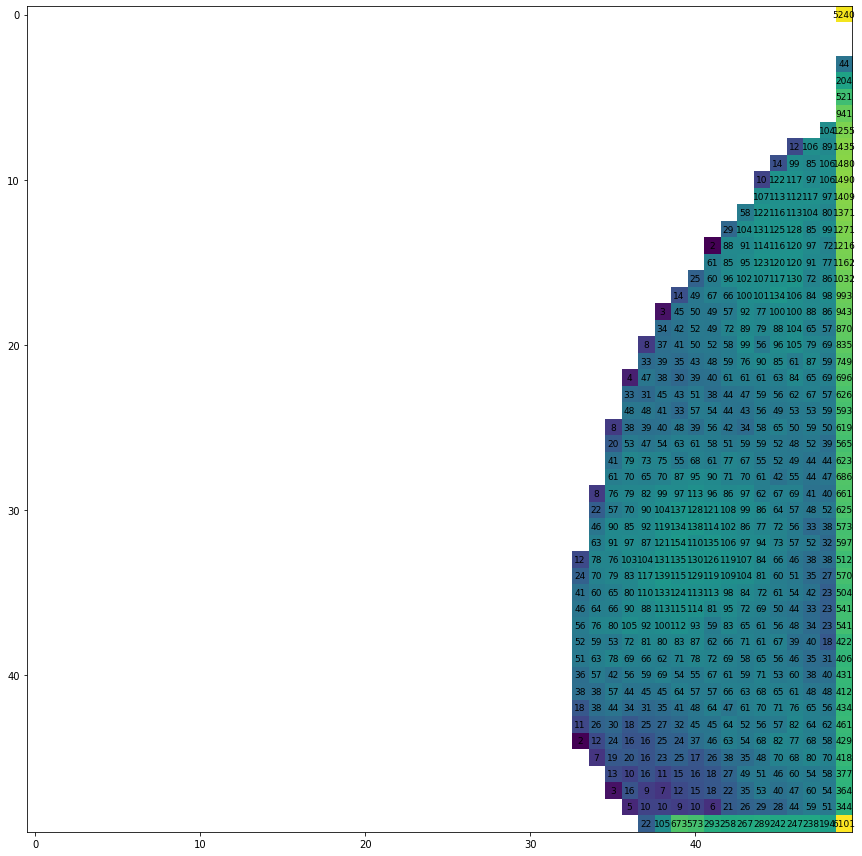

In [ ]:
Heatmap(som_tu, choice_cs, topology=topo, figsize=(12,12), fontsize=9)

<center>

Figure 11 : Heatmap, activation du réseau entrainé sur True Universe par COSMOS.
</center>

Ici nous avons fait tomber le catalogue COSMOS dans la [carte entrainée](#fig10) sur True Universe et nous observons clairement que la zone à forte magnitude (coin supérieur gauche) est évitée. Cela semble signifier que le catalogue COSMOS ne possède pas de galaxies à très forte magnitude.

Pour s'assurer que le résultat précédent n'est pas le fruit d'un autre biais caché, nous faisons tomber sur le SOM entrainé des parties de True Universe : une avec les magnitudes supérieures à $25,2$ et l'autre inférieure à cette limite. Si les parties concordent avec le résultat précédent alors il sera validé puisqu'il ne peut pas y avoir de biais entre un catalogue et lui même.

<a name="fig12"></a>

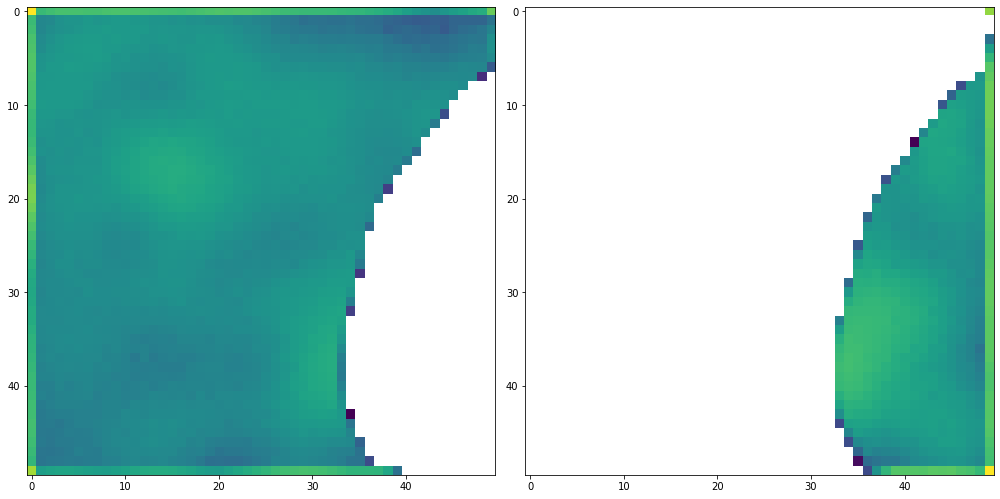

In [ ]:
Heatmap(som_tu, cut_mag_sup, hit_count=False, topology=topo, compare=activ_inf)

<center>

Figure 12 : Heatmap, à gauche activation du réseau entrainé sur True Universe par True universe avec seulement des magnitudes très fortes, \
 à droite activation du réseau entrainé sur True Universe par True universe en excluant les magnitudes très fortes.
</center>


Comme nous pouvons le voir sur le graphique de gauche de la figure [12](#fig12), en ne prenant que les très fortes magnitudes, les neurones activés sont totalement opposés à [ceux activés précédemment](#fig11) par le catalogue COSMOS ne comprenant que des magnitudes plus faibles.

A l'inverse, à droite dans la figure [12](#fig12), en ne prenant que les magnitudes identiques à celles comprisent dans COSMOS, nous obtenons un résultat exactement similaire à celui de la figure [11](#fig11) avec le catalogue COSMOS.

Nous avons donc prouvé ici que les SOMs permettent de détecter des anomalies dans des jeux de données comme des manques dans certains paramètres. Nous rappelerons que le catalogue qui doit servir d'entrainement à la mission Euclid doit être pleinement représentatif de la réalité et en évaluant les résultats à l'aide de SOM nous sommes en mesure de dire si ce catalogue possède des lacunes ou non. <font color='red'>voir ma remarque dans l intro, le probleme n ets pas de dsavoir si TU est reprenstatif de la realite, mais savoir si cosmos couvre bien TU</font> Ici la limite dans la magnitude était visible directement à l'aide d'un histogramme mais d'autres problèmes peuvent être plus difficile à trouver et les SOMs semblent être une bonne solution.

<ins>
<h3> 
Avec tous les paramètres
</h3>
</ins>


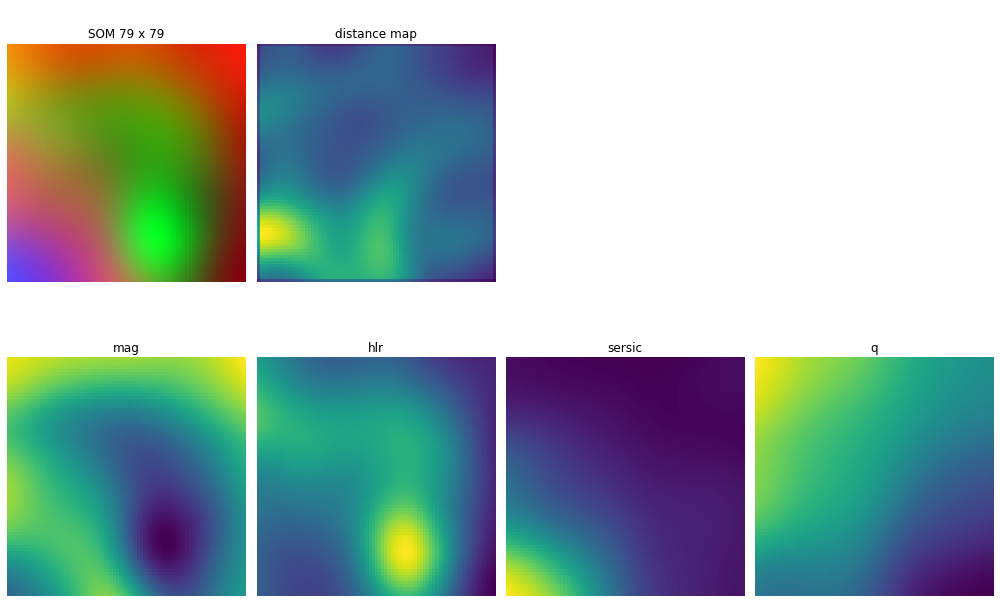

In [ ]:
sigma = 21
learning_rate = 1
topo = 'rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(som_tu, vars_tu, topology=topo, rescale_weigths=True)

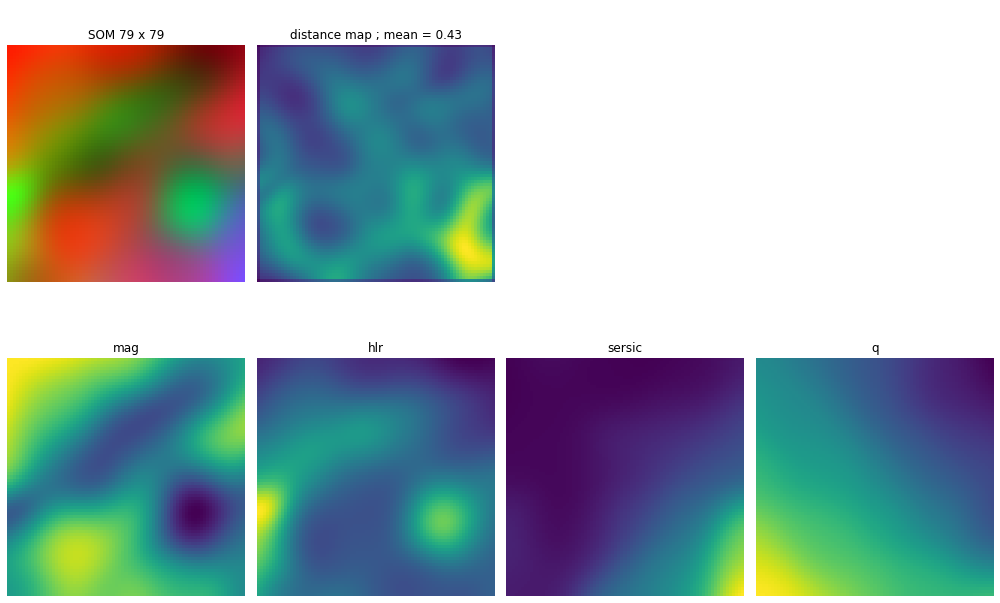

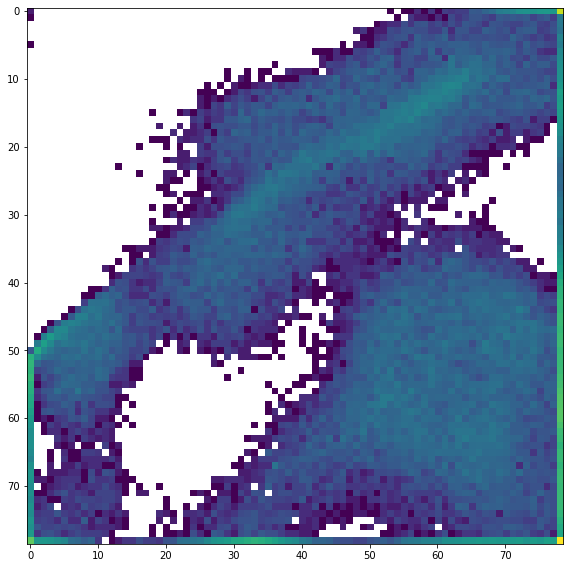

In [ ]:
sigma = 15
learning_rate = 1
topo = 'rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(som_tu, vars_tu, topology=topo, rescale_weigths=True)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

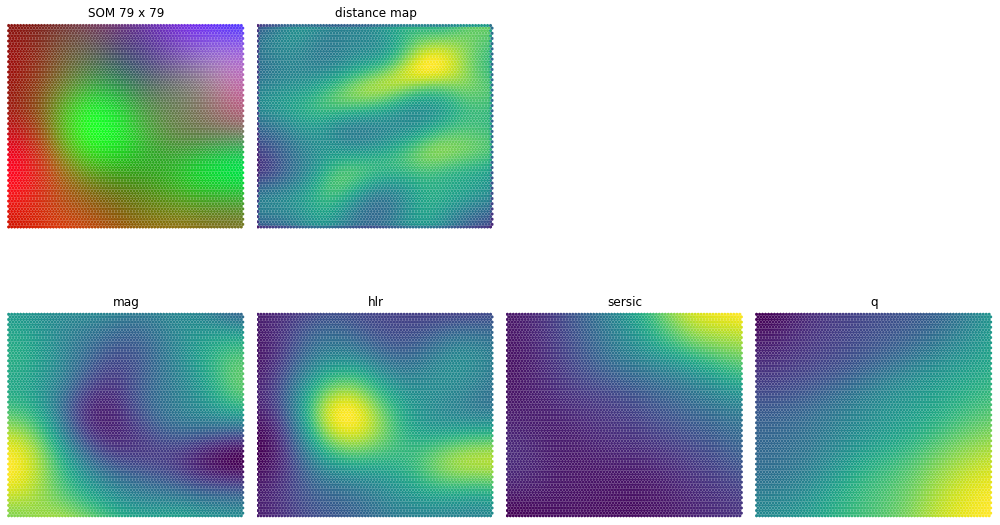

In [ ]:
sigma = 20
learning_rate = 1
topo = 'hexagonal'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(som_tu, vars_tu, topology=topo, rescale_weigths=True)

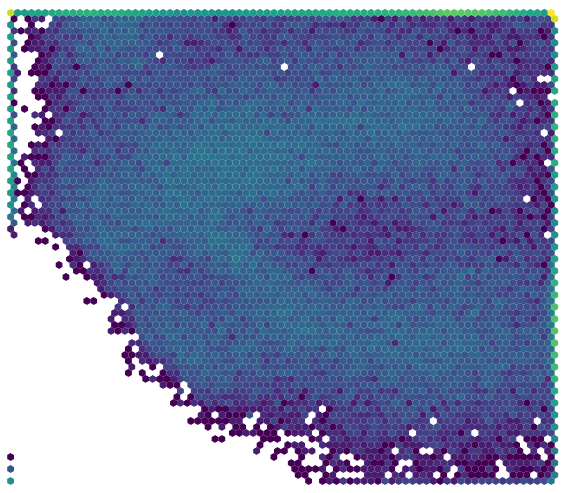

In [ ]:
Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)



#### Check Gx properties near mag 25.2 cut

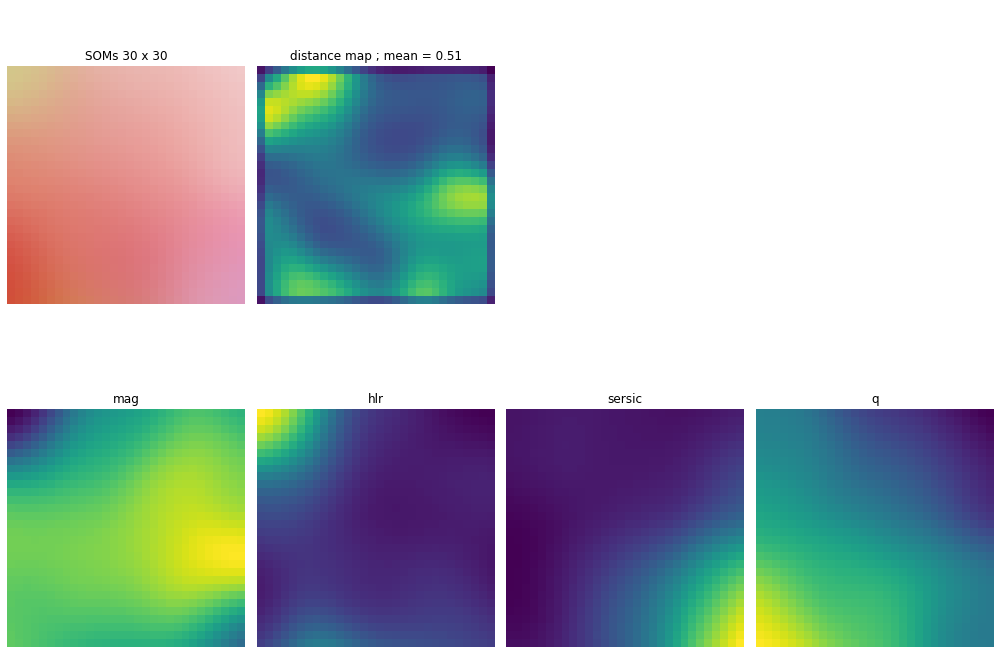

In [ ]:
sigma = 8
learning_rate = 1

som_tu, weights_tu = train_som(xtrain_tu, sigma, learning_rate, 2000, size=(30,30))
PlotSOMs(xtrain_tu, som_tu, weights_tu, vars_tu)

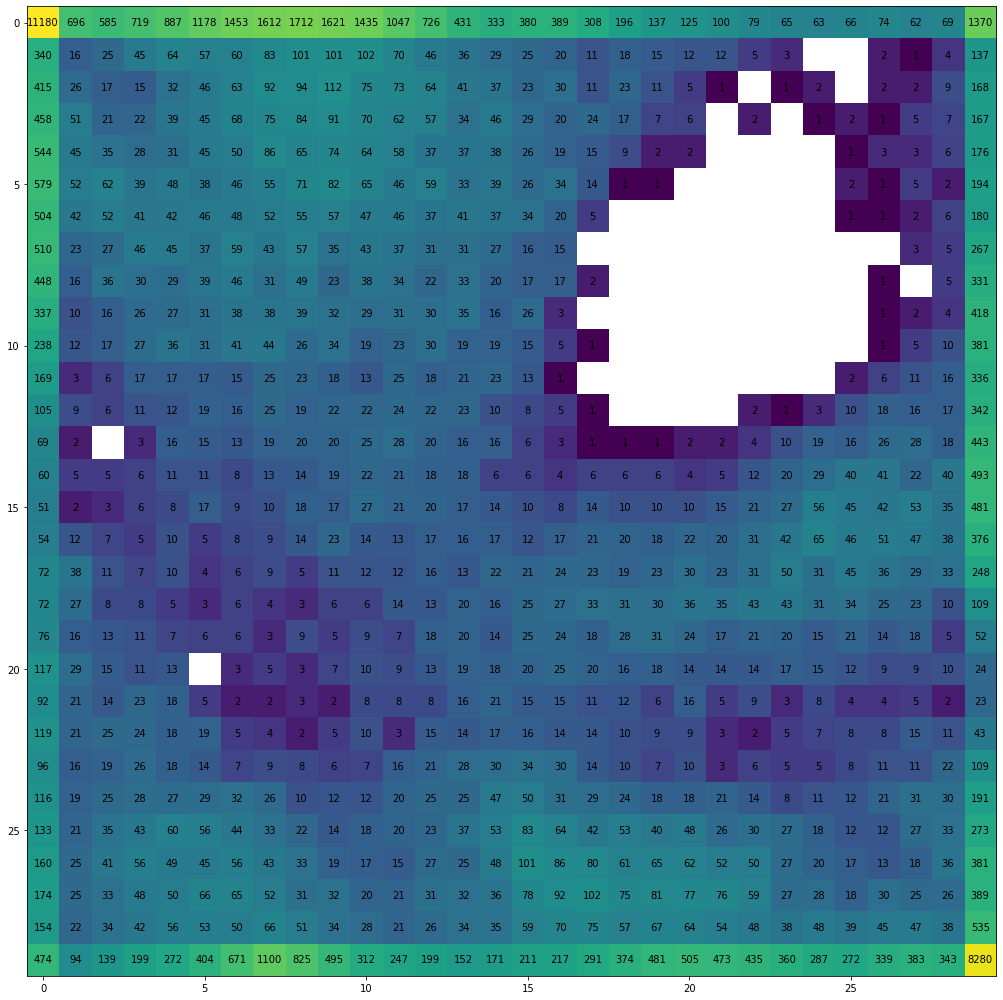

In [ ]:
Heatmap(som_tu, choice_cs, hist_vars=False)

In [ ]:
def act_show(dat, hit=True):
    print(np.argwhere(som_tu.activation_response(dat)))

    plt.imshow(som_tu.activation_response(dat))
    if hit:
        Heatmap(som_tu, choice_cs, figsize=(8,8), hist_vars=False, hit_count=False)

In [ ]:
def get_loc(cat, loc):
    get_idx=[]
    for i,j in enumerate(cat):
        idx = np.argwhere(som_tu.activation_response([j]))[0]
        if sum(idx==loc)==2:
            get_idx.append(i)
    return get_idx

#get_loc(choice_cs, [0,0])

In [ ]:
def check_hist_pos(dat, cat):
    plt.figure(figsize=(18,4))
    for i, vars in enumerate(cat):
        plt.subplot(1,4,i+1)
        plt.title(vars +' ; min=%.2f, max=%.2f\n' % (min(cat[vars]), max(cat[vars])))
        plt.axvline(dat[i], color='k')
        plt.hist(cat[vars], bins=100, density=True)
    plt.tight_layout()
    plt.show()

test hist(s) point proche d'un trou

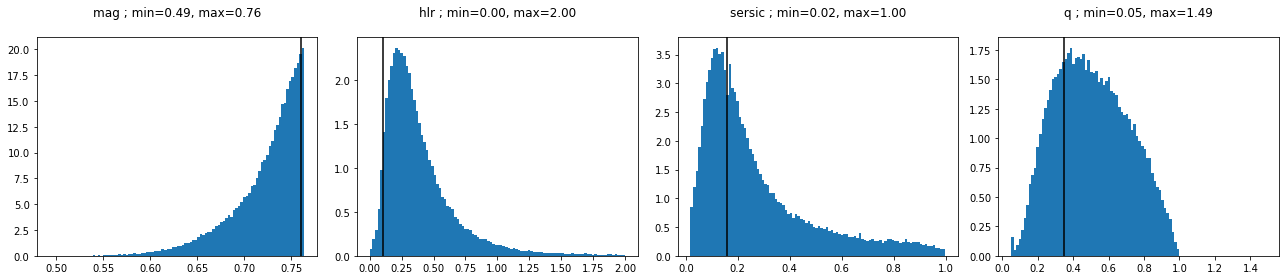

In [ ]:
# galaxie dans COSMOS dont l'activation_response est très proche d'un trou
check_hist_pos(choice_cs[40250], data_cs_norm) # (2, 23) coord inverted -> au dessus du trou

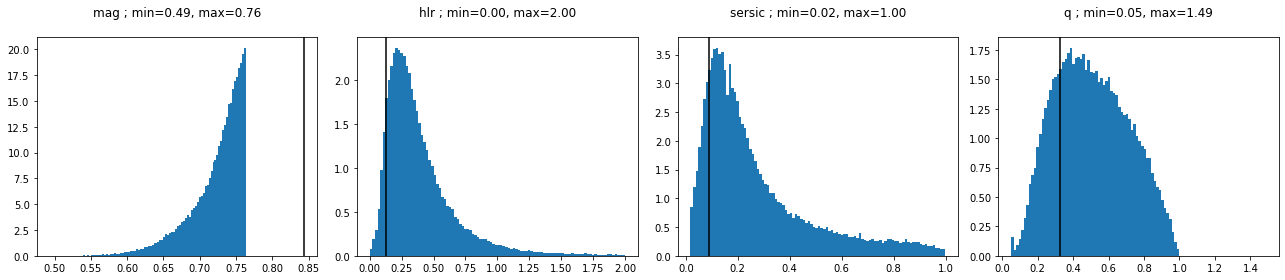

In [ ]:
check_hist_pos(choice_tu[171], data_cs_norm) # (2, 23)

le trou correspond donc bien au manque de Gx à forte mag (sup 25.2) dans CS

dans TU mag > 25.2 pour ce point et ceux du trou


bonne correspondance COSMOS TU pour tous les params sauf mag -> point dans les fortes mag et CS possède une limite à 25.2 en mag

---

ici coin sup gauche, correspond au pic de hlr

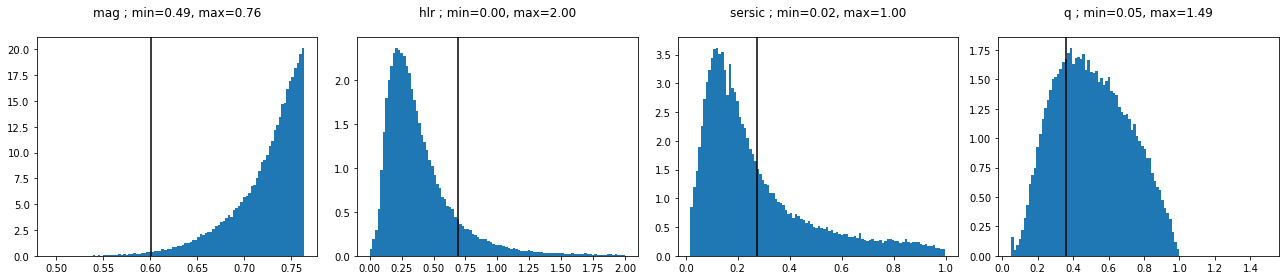

In [ ]:
check_hist_pos(choice_cs[8], data_cs_norm) # (0, 0)

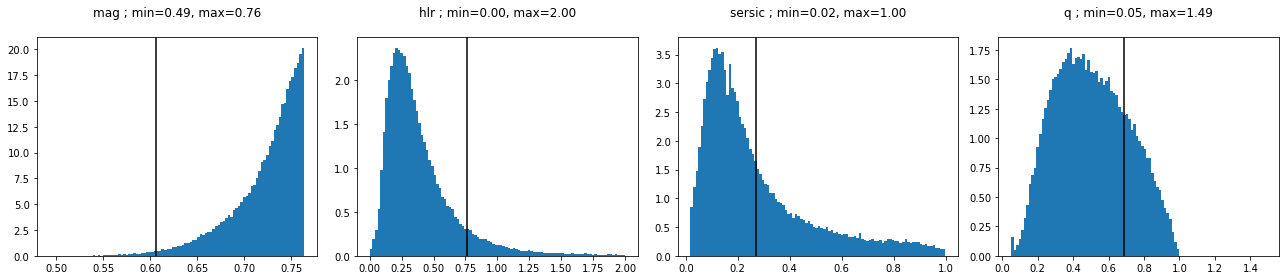

In [ ]:
check_hist_pos(choice_tu[110], data_cs_norm) # (0, 0)

en effet hlr assez fort et mag très faible

bonne correspondance COSMOS TU pour tous les params

# Conclusion

<font color='red'>Bien mettre en valeur le travail de prise en main, d exploration, de maitrise vraiement precise de la technique de som grace au travail sur le jeu de couleur. Faudra noteemment voir si on ne rajoute pas une partie sur les problemes rencontres (effets de bords, normalisation des donnes, equilibrage des echantillons, etc).
    
Expliquer que la technique ets vraiement prometteuse, a la fois pour notre objectif (flag de qualite avec le VAE), mais aussi de facon plus generale pour etudier les supports de catalogues.

T as vraiement fait du bon boulot, mais il faut faire comprendre au jury que c est le cas, faut pas qu il pense que t as majoritairement joue sur des couleurs et que cest pas de l astro, pas interessant etc. Faut mettre l accent sur le fait que le stage etait axee sur la decouverte d un nouvel outil, et que tu as reussi et que tu montres que ca a l air d etre vraiement exploitable pour la recherche. pour un stage de m1 c est deja vraiemnt trss bien !</font>

Cet outil permettra donc de déceler des potentiels manques dans le jeu de données d'entrainement qui servira à analyser les galaxies trouvées par le téléscope spatial 

<font color='red'>Remarques Globales : 
- developper plus les ideees theoriques, les concepts, mais aussi le choix des parametres, etc
- parler des utilisation des SOMs en astro
</font>

# Références

<font color='red'> mettre des numéros et links dans le texte avec les refs</font>

- European Space Agency, [Mission Euclid](https://www.esa.int/Space_in_Member_States/France/Euclid_une_mission_destinee_a_percer_les_mysteres_de_l_energie_noire_et_de_la_matiere_noire)


- Gregory T. Breard, Thèse : [Evaluating Self-Organizing Map Quality Measures as Convergence Criteria](https://digitalcommons.uri.edu/cgi/viewcontent.cgi?article=2013&context=theses), 2017, Université de Rhode Island.


- Sersic J. L., Boletín de la Asociación Argentina de Astronomía, Vol. 6, pp. 41-43,  [Influence of the atmospheric and instrumental dispersion on the brightness distribution in a galaxy](https://ui.adsabs.harvard.edu/abs/1963BAAA....6...41S/abstract), 1963

- Bibliothèque [Minisom](https://github.com/JustGlowing/minisom) sur Github